<a href="https://colab.research.google.com/github/urmilapol/urmilapolprojects/blob/master/EDAairbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Airbnb connects people who have a place to rent and people who need a place to stay. It has become so popular and successful that most of us consider Airbnb as an option in our travel plans.
There are several factors that play a key role in defining the price of a place. Hosts are expected to list a reasonable price for their places.
On the other hand, people who look for a place to stay evaluate the listings with regards to several features such as location, size, amenities, and most importantly the price.
In this article, we will try to find out which features have an impact on the price of a place. There are many Airbnb datasets available with a creative commons license so feel free to use and explore them.
We will be using Pandas and Seaborn libraries for Python. Thus, this article will also be a practical guide for these libraries.
There are many datasets available on the website. The one we will be using is the listings file on 07 July 2021 from Barcelona, Spain. Let’s start by importing Pandas and reading the data from the CSV file to create a DataFrame.

In [1]:
import pandas as pd
listings = pd.read_csv("/content/sample_data/listings.csv")
print(listings.shape)
(17079, 74)

(16055, 18)


(17079, 74)

Data Cleaning
Some of the columns are not in a proper format for analysis. For instance, the price, host acceptance rate, and host response rate columns are stored as strings.

In [11]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [12]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16055 entries, 0 to 16054
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16055 non-null  int64  
 1   name                            16045 non-null  object 
 2   host_id                         16055 non-null  int64  
 3   host_name                       16014 non-null  object 
 4   neighbourhood_group             16055 non-null  object 
 5   neighbourhood                   16055 non-null  object 
 6   latitude                        16055 non-null  float64
 7   longitude                       16055 non-null  float64
 8   room_type                       16055 non-null  object 
 9   price                           16055 non-null  int64  
 10  minimum_nights                  16055 non-null  int64  
 11  number_of_reviews               16055 non-null  int64  
 12  last_review                     

In [13]:
listings.shape

(16055, 18)

In [18]:
listings[["price","host_name"]].dtypes

price         int64
host_name    object
dtype: object

In [19]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,121,1,21,2019-10-11,0.23,19,47,0,HUTB-002062
1,23197,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41291,2.22063,Entire home/apt,220,4,52,2019-12-15,0.74,2,86,0,HUTB-005057
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,144,2,63,2019-09-06,0.60,3,85,0,HUTB-001722
3,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,181,4,156,2020-03-11,1.55,2,136,7,HUTB-001506
4,35379,Double 04 CasanovaRooms Barcelona,152232,Pablo,Eixample,l'Antiga Esquerra de l'Eixample,41.39036,2.15274,Private room,41,2,358,2021-07-21,4.01,4,193,41,Exempt


In [20]:
listings.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
16050,52685901,Avinguda dels Quinze 70 1º4º - Room 1,1503151,Alex,Nou Barris,Vilapicina i la Torre Llobeta,41.427810,2.17350,Private room,25,32,0,NaN,NaN,72,283,0,NaN
16051,52686011,Avinguda dels Quinze 70 1º4º - Room 2,1503151,Alex,Nou Barris,Vilapicina i la Torre Llobeta,41.427690,2.17572,Private room,23,32,0,NaN,NaN,72,314,0,NaN
16052,52686117,DOUBLE PRIVATE ROOM + PRIVATE LIVING ROOM,394998732,Antonio,Eixample,la Dreta de l'Eixample,41.397330,2.17106,Private room,50,5,0,NaN,NaN,4,350,0,Exempt
16053,52686118,Avinguda dels Quinze 70 1º4º - Room 3,1503151,Alex,Nou Barris,Vilapicina i la Torre Llobeta,41.428290,2.17546,Private room,21,32,0,NaN,NaN,72,283,0,NaN
16054,52702678,Barcelona Sunlight,85283418,Jordi,Eixample,el Fort Pienc,41.395981,2.18470,Entire home/apt,131,3,0,NaN,NaN,4,26,0,HUTB-001126


In [21]:
import seaborn as sns
sns.set_theme(font_scale=1.5, style="darkgrid")

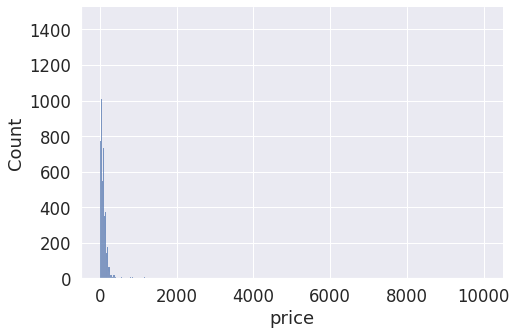

In [22]:
sns.displot(data=listings, x="price", kind="hist", aspect=1.5)

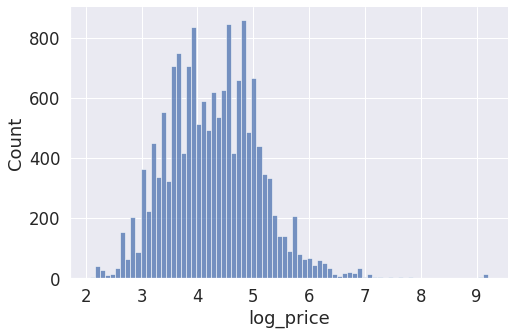

In [24]:
import numpy as np
listings = listings[listings.price!=0]
listings.loc[:,"log_price"] = np.log(listings.loc[:,"price"])
sns.displot(data=listings, x="log_price", kind="hist", aspect=1.5)